In [19]:
import os 
import sys
import numpy as np
from scr.lattice import Lattice
from scr.random_walk import RandomWalk
from scr.simulation import Simulation
from scr.utils import make_video
from tqdm import tqdm 

## Dimension 2

In [20]:
simu_name = "plot_dim2"
os.mkdir(simu_name)
os.mkdir(simu_name + "/frames")

### Initialize

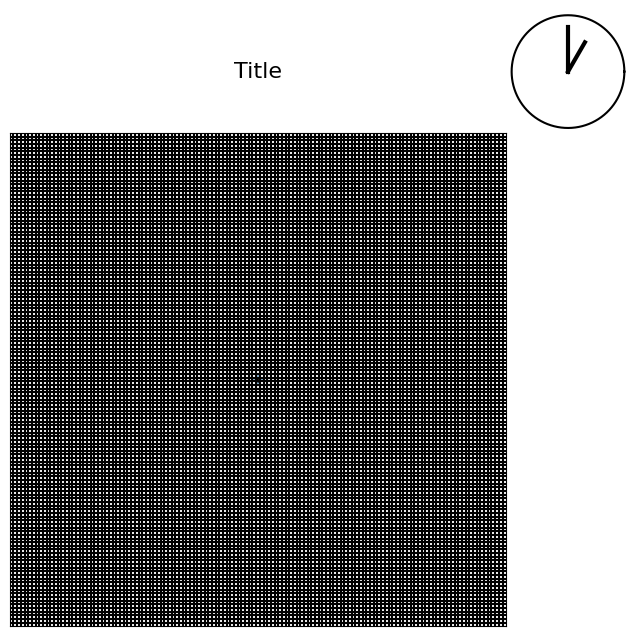

In [21]:
L = 134
lat = Lattice(dim=2,L=L)
rw = RandomWalk(x=np.array([[L/2,L/2]]))
simu = Simulation(rw,lat,N_traj_plot=0)
t_iter = 0

### Step 1: Show mechanism

In [22]:
simu.lat.set_title("Close look")
simu.lat.set_zoom(10)
simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")

simu.N_nbgh_plot = 1
# simu.N_traj_plot = 1
# simu.trajs_plot[0].set(alpha=0.0)

arrow_east = simu.lat.ax.arrow(simu.rw.x[0,0]+0.1,simu.rw.x[0,1],1.0,0.0,color='k',length_includes_head=True,width=0.08,head_length=0.24)
arrow_north = simu.lat.ax.arrow(simu.rw.x[0,0],simu.rw.x[0,1]+0.1,0.0,1.0,color='k',length_includes_head=True,width=0.08,head_length=0.24)
arrow_west = simu.lat.ax.arrow(simu.rw.x[0,0]-0.1,simu.rw.x[0,1],-1.0,0.0,color='k',length_includes_head=True,width=0.08,head_length=0.24)
arrow_south = simu.lat.ax.arrow(simu.rw.x[0,0],simu.rw.x[0,1]-0.1,0.0,-1.0,color='k',length_includes_head=True,width=0.08,head_length=0.24)

simu.lat.fig

for _ in tqdm(range(80)):
    t_iter +=1
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
    
arrow_east.remove()
arrow_north.remove()
arrow_west.remove()
arrow_south.remove()

simu.N_nbgh_plot = 0
simu.extra["nbgh"].set(alpha=0.0)

100%|██████████| 80/80 [00:03<00:00, 24.88it/s]


[None]

### Step 2: Run simulation

In [23]:
simu.lat.set_title("Run the simulation")

simu.rw.rate = 3.0

for _ in tqdm(range(250)):
    simu.update()
    t_iter +=1
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")

100%|██████████| 250/250 [00:09<00:00, 25.21it/s]


### Step 3: Pause: show trajectory

In [24]:
simu.lat.set_title("Now show the trajectory")

# simu.trajs_plot[0].set(alpha=1.0)
simu.N_traj_plot = 1
simu.trajs_plot = simu._Simulation__plot_traj()
simu.traj = [simu.rw.x.copy()]
    
for _ in tqdm(range(40)):
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
    t_iter += 1
    
for _ in tqdm(range(250)):
    simu.update()
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
    t_iter += 1

100%|██████████| 250/250 [00:10<00:00, 24.97it/s]


### Step 4: Pause: dezoom

In [25]:
simu.lat.set_title("Pause: zoom out")

lw = 1.0
for k in tqdm(range(L-10)):
    simu.lat.set_zoom(10+k)
    simu.lat.set_lines_param(linewidth=lw/(k+1))
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
    t_iter += 1
    
for _ in tqdm(range(60)):
    simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
    t_iter += 1

100%|██████████| 60/60 [00:02<00:00, 22.23it/s]


### Step 5: Speed up and run the simulation

In [26]:
simu.lat.set_title("Speed up")

simu.rw.rate = 30.0
simu.trajs_plot[0].set(linewidth=1.6)
for k in tqdm(range(10000)):
    simu.update(update_nbgh=True,update_traj=(k%15==0))
    if k%15==0:
        simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
        t_iter +=1

100%|██████████| 10000/10000 [00:32<00:00, 310.80it/s]


### Final step

In [27]:
make_video(simu_name=simu_name,video_name=simu_name)